Importing all necessary libraries


In [345]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


Now, we define the nth root of unity in Euler's form 

In [346]:
def nth_root_of_unity(N):
    theta=2*np.pi/N
    omega=complex(np.cos(theta),-np.sin(theta))
    return omega


The DFT matrix is matrix for values of exp^(PI/N*2) raised to product of corresponding value of i and j of element in DFT matrix.
The DFT matrix is independent of number of datapoints. So, it can be pre-computed and reused.

In [347]:
def calculate_dft(n):
    DFTarray=np.zeros([n,n],dtype=complex)
    for i in range(n):
        for j in range(n):
            omega=nth_root_of_unity(n)
            DFTarray[i,j]=np.power(omega,i*j)
    return DFTarray

Calculating DFT matrix of size 100 X 100

In [398]:
DFTarray=calculate_dft(100)
DFTarray.shape

(100, 100)

The element of first row and first column must be 1

In [399]:
DFTarray[10,0],DFTarray[0,5]

((1+0j), (1+0j))

Matrix Multiplication

In [350]:
matA=[[1,2,3]]
matB=[[1],[2],[3]]
matA=np.array(matA)
matB=np.array(matB)
prod_mat=np.matmul(matB,matA)
prod_mat.shape

(3, 3)

An array with numbers from 0 to 99

In [351]:
matC=np.arange(100)
matC.shape

(100,)

Re-arranging the 1D array in 2D matrix.

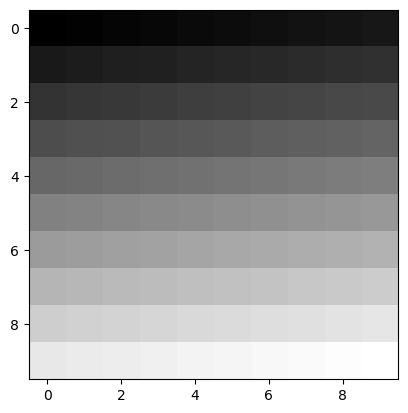

In [400]:
matCasImage=matC.reshape(10,10)
plt.imshow(matCasImage,cmap='gray')

Now, the frequency domain for 100 datapoints (with values from 0 to 99 ) are computed

In [403]:
freq_domain=np.matmul(matC,calculate_dft(100))
freq_domain.shape

(100,)

The corresponding real and imaginary values of each frequencies in frequency domain

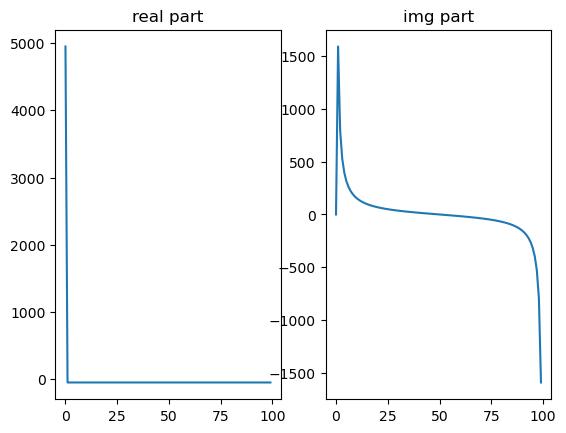

In [354]:
real_part = np.real(freq_domain)
imag_part = np.imag(freq_domain)

#visualization of frequency domain of real/imaginary part
plt.subplot(1,2,1)
plt.title("real part")
plt.plot(real_part)

plt.subplot(1,2,2)
plt.title("img part")
plt.plot(imag_part)

let's see how the datapoints transformed in frequency domain would look like if we treat them as pixels of image

In [355]:
freq_Domain=freq_domain.reshape(10,10)
freq_Domain.shape

(10, 10)

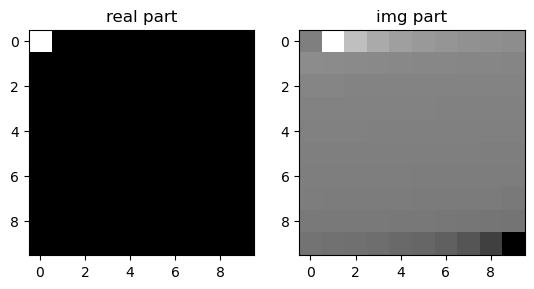

In [356]:
real_part = np.real(freq_Domain)
imag_part = np.imag(freq_Domain)

#visualization of frequency domain of real/imaginary part
plt.subplot(1,2,1)
plt.title("real part")
plt.imshow(real_part, cmap='gray')

plt.subplot(1,2,2)
plt.title("img part")
plt.imshow(imag_part, cmap='gray')

Now, to add a watermark to the image, an array of size 100 is populated with values around mean 46 and standard deviation 1.

In [407]:
watermark=np.random.normal(46,1,100)
watermark.shape

(100,)

Reshaping 1D watermark array in 2D matrix

In [358]:
Watermark=watermark.reshape(10,10)

This is how the watermark matrix if treated as image would look like

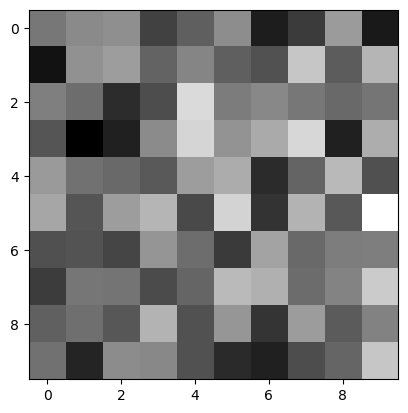

In [359]:
plt.imshow(Watermark,cmap='gray')

Now, the datapoints of watermark array are transferred into frequency domain

In [408]:
watermark_freq=np.matmul(watermark,calculate_dft(100))
watermark_freq.shape

(100,)

In [409]:
Watermark_freq=watermark_freq.reshape(10,10)
Watermark_freq.shape

(10, 10)

Real and imaginary part corresponding values on frequency domain

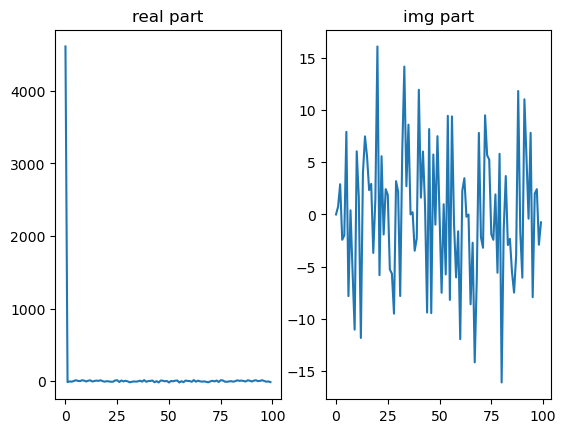

In [362]:
real_part = np.real(watermark_freq)
imag_part = np.imag(watermark_freq)

#visualization of frequency domain of real/imaginary part
plt.subplot(1,2,1)
plt.title("real part")
plt.plot(real_part)

plt.subplot(1,2,2)
plt.title("img part")
plt.plot(imag_part)

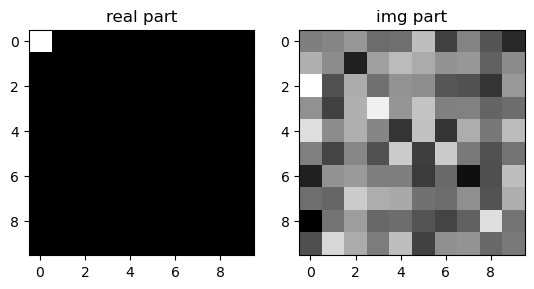

In [363]:
real_part = np.real(Watermark_freq)
imag_part = np.imag(Watermark_freq)

#visualization of frequency domain of real/imaginary part
plt.subplot(1,2,1)
plt.title("real part")
plt.imshow(real_part, cmap='gray')

plt.subplot(1,2,2)
plt.title("img part")
plt.imshow(imag_part, cmap='gray')

the watermark is embedded into original image by adding their correspomding frequencies' amplitudes

In [364]:
newfreq_domain=freq_domain+watermark_freq

In [365]:
newfreq_Domain=newfreq_domain.reshape(10,10)
newfreq_Domain.shape

(10, 10)

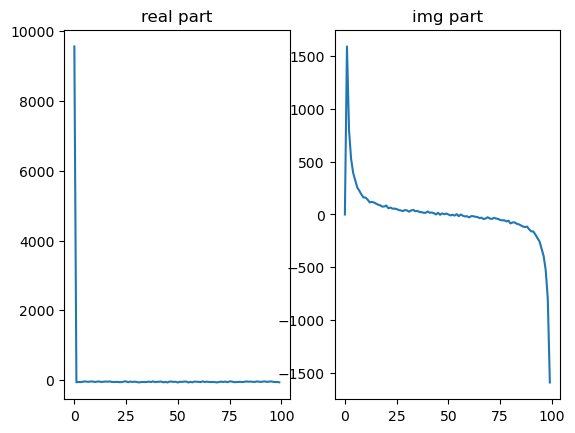

In [366]:
real_part = np.real(newfreq_domain)
imag_part = np.imag(newfreq_domain)

#visualization of frequency domain of real/imaginary part
plt.subplot(1,2,1)
plt.title("real part")
plt.plot(real_part)

plt.subplot(1,2,2)
plt.title("img part")
plt.plot(imag_part)

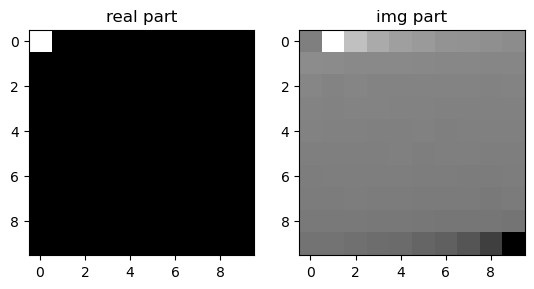

In [367]:
real_part = np.real(newfreq_Domain)
imag_part = np.imag(newfreq_Domain)

#visualization of frequency domain of real/imaginary part
plt.subplot(1,2,1)
plt.title("real part")
plt.imshow(real_part, cmap='gray')

plt.subplot(1,2,2)
plt.title("img part")
plt.imshow(imag_part, cmap='gray')

Now the frequency domain is transferred back into the spatial/time domain

In [368]:
def calculate_IDFT(n):
    IDFTarray=np.zeros([n,n],dtype=complex)
    for i in range(n):
        for j in range(n):
            omega=nth_root_of_unity(-n)
            DFTarray[i,j]=np.power(omega,i*j)
    return DFTarray

In [369]:
time_domain=(np.matmul(newfreq_domain,calculate_IDFT(100)))/100
time_domain.shape

(100,)

In [370]:
newtime_domain=time_domain.reshape(10,10)
newtime_domain.shape

(10, 10)

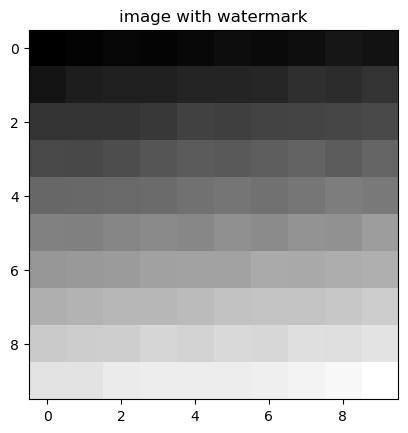

In [422]:
real_part = np.real(newtime_domain)
plt.title("image with watermark")
plt.imshow(real_part, cmap='gray')



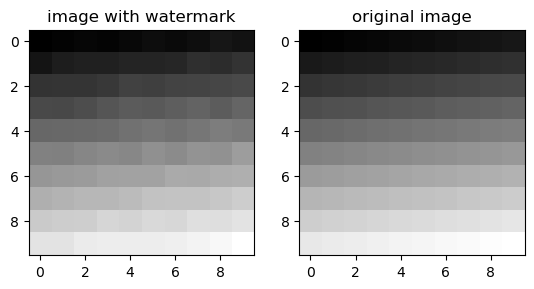

In [423]:
plt.subplot(1,2,1)
plt.title("image with watermark")
plt.imshow(real_part, cmap='gray')
plt.subplot(1,2,2)
plt.title("original image")
plt.imshow(matCasImage,cmap='gray')

The watermark can be detected if we have the original signal

In [372]:
freq_Domain_for_watermarked_image=(np.matmul(time_domain,calculate_dft(100)))

In [373]:
detected_watermark=freq_Domain_for_watermarked_image-freq_domain

In [374]:
tD_for_watermark=(np.matmul(detected_watermark,calculate_IDFT(100)))/100

In [375]:
newtD_for_watermark=tD_for_watermark.reshape(10,10)
newtD_for_watermark.shape

(10, 10)

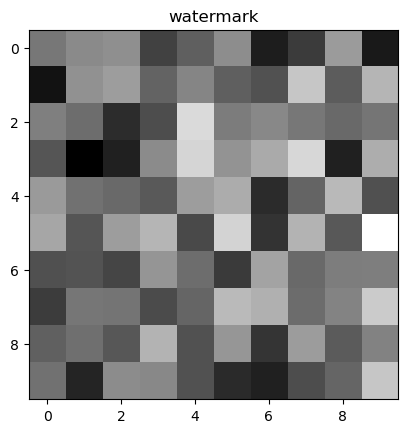

In [424]:
real_part = np.real(newtD_for_watermark)

#visualization of frequency domain of real/imaginary part
plt.title("watermark")
plt.imshow(real_part, cmap='gray')

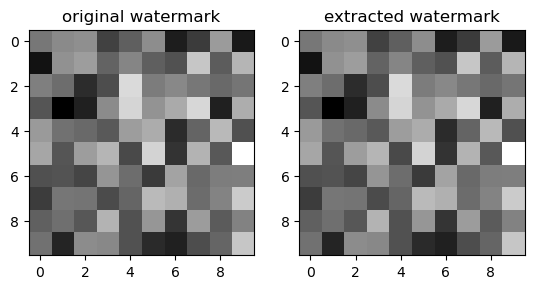

In [426]:
plt.subplot(1,2,1)
plt.title("original watermark")
plt.imshow(Watermark,cmap='gray')
plt.subplot(1,2,2)
plt.title("extracted watermark")
plt.imshow(real_part,cmap='gray')

There is a problem with this method of transformation. If the number of datapoints is large ( size of image/signal is large ), this methos becomes costly.

In [415]:
calculate_dft(100)

array([[1.        +0.j        , 1.        +0.j        ,
        1.        +0.j        , ..., 1.        +0.j        ,
        1.        +0.j        , 1.        +0.j        ],
       [1.        +0.j        , 0.99802673-0.06279052j,
        0.9921147 -0.12533323j, ..., 0.98228725+0.18738131j,
        0.9921147 +0.12533323j, 0.99802673+0.06279052j],
       [1.        +0.j        , 0.9921147 -0.12533323j,
        0.96858316-0.24868989j, ..., 0.92977649+0.36812455j,
        0.96858316+0.24868989j, 0.9921147 +0.12533323j],
       ...,
       [1.        +0.j        , 0.98228725+0.18738131j,
        0.92977649+0.36812455j, ..., 0.84432793-0.53582679j,
        0.92977649-0.36812455j, 0.98228725-0.18738131j],
       [1.        +0.j        , 0.9921147 +0.12533323j,
        0.96858316+0.24868989j, ..., 0.92977649-0.36812455j,
        0.96858316-0.24868989j, 0.9921147 -0.12533323j],
       [1.        +0.j        , 0.99802673+0.06279052j,
        0.9921147 +0.12533323j, ..., 0.98228725-0.18738131j,
 

To overcome this problem, fast fourier transform is implemented which uses divide

and conquer algorithm and reduces the time complexity from O(n^2) to O(nlogn)